# Personal finance analysis

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from scipy import stats

%matplotlib inline

In [122]:
col_names = ["date", "concept", "category", "amount", "type", "account"]

finance = pd.read_csv("finance_test.csv", header = None, index_col=False, names = col_names)

In [194]:
finance.head()

,date,concept,category,amount,type,account
0,2019-04-17,BON AREA,Supers e hipers,-1.73,Gasto (G),Visa Electron ...2036
1,2019-04-17,TRANSF. A SU FAVOR,Transferencias recibidas,8.00,Ingreso (I),Cuenta ...8503
2,2019-04-17,TRANSF. A SU FAVOR,Transferencias recibidas,9.00,Ingreso (I),Cuenta ...8503
3,2019-04-16,"PECUNIA CARDS EDE, S.L.U.",Teléfono / Internet,-25.00,Gasto (G),Visa Electron ...2036
4,2019-04-15,Sociedad General de Aguas de Barcelona,Hogar,-35.08,Gasto (G),Cuenta ...8503


In [193]:
finance.tail()

,date,concept,category,amount,type,account
715,2017-07-27,TRIOMF DONNER,Restaurantes,-7.50,Gasto (G),Visa Electron ...2036
716,2017-07-27,CAJ.LA CAIXA OF.3002,Dinero del cajero,-20.00,Gasto (G),Visa Electron ...2036
717,2017-07-26,MOSQUITO TAPAS,Restaurantes,-15.90,Gasto (G),Visa Electron ...2036
718,2017-07-26,COFEE LAB,Supers e hipers,-10.00,Gasto (G),Visa Electron ...2036
719,2017-07-26,AMAZON.ES COMPRA,Varios,13.99,Gasto (G),Visa Electron ...2036


### Check size of data, types and null values

In [124]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
date        720 non-null object
concept     720 non-null object
category    720 non-null object
amount      720 non-null object
type        720 non-null object
account     720 non-null object
dtypes: object(6)
memory usage: 33.8+ KB


### Convert "date" to datetime format

In [181]:
finance['date'] = pd.to_datetime(finance.date, format='%d/%m/%Y')

### Convert "amount" to numeric value

In [125]:
# Replace dots for blankspace (1.000 -> 1000)
finance['amount'] = finance.amount.str.replace('.', '', regex=True)

In [ ]:
# Replace commas for dots (1,5 -> 1.5)
finance['amount'] = finance.amount.str.replace(',', '.', regex=True)

In [127]:
# Convert to numeric
finance['amount'] = pd.to_numeric(finance.amount, errors='raise')

In [182]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
date        720 non-null datetime64[ns]
concept     720 non-null object
category    720 non-null object
amount      720 non-null float64
type        720 non-null object
account     720 non-null object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 33.8+ KB


### Export csv after fixing types to upload to the cloud

In [185]:
finance.to_csv('out.csv')

### Statistical exploration of each category 

In [171]:
finance.groupby(['category'])['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Alquiler de vehículos,1.0,-0.400000,NaN,-0.40,-0.4000,-0.400,-0.4000,-0.40
Bienestar y belleza,5.0,-13.780000,7.502799,-25.00,-14.0000,-14.000,-11.9000,-4.00
Cuotas y suscripciones,3.0,-11.916667,6.957071,-19.95,-13.9250,-7.900,-7.9000,-7.90
Dinero del cajero,17.0,-63.529412,164.921996,-700.00,-30.0000,-20.000,-10.0000,-10.00
Educación,3.0,-211.166667,205.981998,-449.00,-271.7500,-94.500,-92.2500,-90.00
Electrónica y electrodomésticos,10.0,-13.863000,257.795803,-546.13,-26.3325,-16.325,-6.4800,546.13
Hogar,18.0,-32.113333,28.086797,-135.47,-33.6775,-31.730,-21.4800,-3.04
Hoteles,3.0,-44.796667,152.030167,-134.39,-132.5650,-130.740,0.0000,130.74
Impuestos y multas,6.0,-319.191667,624.136911,-1587.26,-148.7775,-69.680,-17.5075,-13.27


### Check for data correctness

In [132]:
# There is something weird, type "gasto" should have negative amounts
finance[(finance["amount"] > 0) & (finance['type'] == "Gasto (G)")]

,date,concept,category,amount,type,account
54,07/02/2019,AMZ*Al Wholesale Store,Varios,312.98,Gasto (G),Visa Electron ...2036
106,20/12/2018,COND.CUOTA TARJETA,Varios,28.00,Gasto (G),Cuenta ...8503
129,10/12/2018,PP*5427CODE,Servicios varios,1.50,Gasto (G),Visa Electron ...2036
398,09/03/2018,AMAZON MKTPLACE PMTS,Varios,2.51,Gasto (G),Visa Electron ...2036
424,22/02/2018,LIDL C PUJADES,Supers e hipers,5.99,Gasto (G),Visa Electron ...2036
508,20/12/2017,COND.CUOTA TARJETA,Varios,28.00,Gasto (G),Cuenta ...8503
551,02/12/2017,PAYPAL *GWOTD,"Libros, prensa, música y películas",20.26,Gasto (G),Visa Electron ...2036
634,10/10/2017,PAYPAL *BRECK COMPU,Electrónica y electrodomésticos,546.13,Gasto (G),Visa Electron ...2036
702,09/08/2017,AIRBNB.COM,Hoteles,130.74,Gasto (G),Visa Electron ...2036
719,26/07/2017,AMAZON.ES COMPRA,Varios,13.99,Gasto (G),Visa Electron ...2036


In [189]:
finance[(finance["amount"] < 0) & (finance['type'] == "Ingreso (I)")]

,date,concept,category,amount,type,account


### Data visualization of transactions "amount"

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Change size

In [158]:
finance["amount"].describe()

count     720.000000
mean       -0.022972
std       121.689075
min     -1587.260000
25%       -12.210000
50%        -4.380000
75%        -1.795000
max      1605.000000
Name: amount, dtype: float64

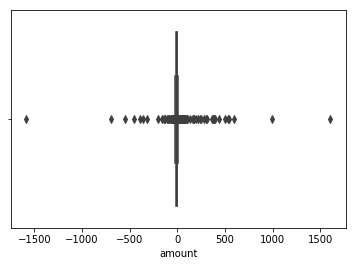

In [138]:
sns.boxplot(x = finance["amount"])

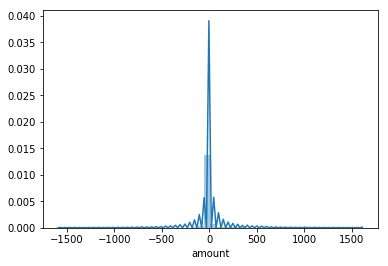

In [176]:
sns.distplot(finance["amount"])

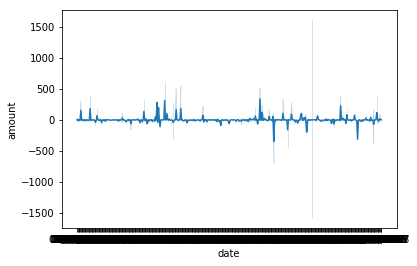

In [177]:
ax = sns.lineplot(x="date", y="amount", data=finance)

### Testing if transactions are normally distributed

In [199]:
k2, p = stats.normaltest(finance['amount'])

In [200]:
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)
